Импортируйте библиотеки pandas, numpy и matplotlib.



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

 Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
y = pd.DataFrame(boston_dataset.target, columns=["target"])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

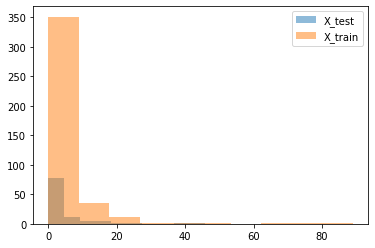

In [7]:
plt.hist(X_test['CRIM'], alpha = 0.5)
plt.hist(X_train['CRIM'], alpha = 0.5)
plt.legend(['X_test', 'X_train'])

In [8]:
X_test['CRIM'].mean()

3.630946764705883

In [9]:
X_train['CRIM'].mean()

3.609124628712873

Масштабируйте данные с помощью StandardScaler. 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=boston_dataset.feature_names)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [12]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=boston_dataset.feature_names)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


Постройте модель TSNE на тренировочныx данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)

In [15]:
X_train_tsne=tsne.fit_transform(X_train_scaled)

In [16]:
print(f"До:\t{X_train_scaled.shape}")
print(f"После:\t{X_train_tsne.shape}")

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

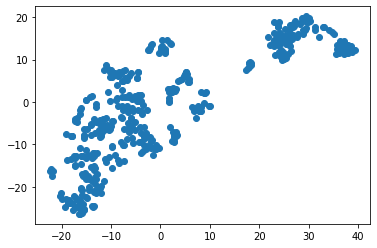

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.



In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train=kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

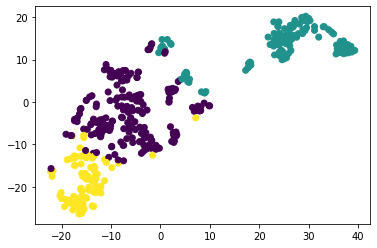

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price в разных кластерах.

In [20]:
y_train[labels_train == 0].mean()

target    24.958115
dtype: float64

In [21]:
y_train[labels_train == 1].mean()

target    16.165354
dtype: float64

In [22]:
y_train[labels_train == 2].mean()

target    27.788372
dtype: float64

Вычислите средние значения CRIM в разных кластерах.

In [23]:
X_train['CRIM'][labels_train == 0].mean()

0.42166020942408367

In [24]:
X_train['CRIM'][labels_train == 1].mean()

10.797028425196853

In [25]:
X_train['CRIM'][labels_train == 2].mean()

0.07356558139534886

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [26]:
labels_test=kmeans.predict(X_test_scaled)

Вычислите средние значения price в разных кластерах.

In [27]:
y_test[labels_test == 0].mean()

target    21.860784
dtype: float64

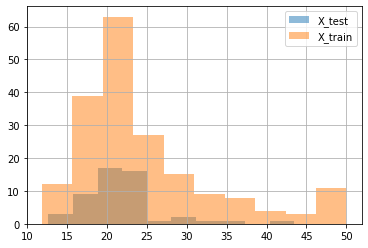

In [29]:

y_test['target'][labels_test == 0].hist(alpha = 0.5)
y_train['target'][labels_train == 0].hist(alpha = 0.5)
plt.legend(['X_test', 'X_train'])

In [30]:
y_test[labels_test == 1].mean()

target    16.437143
dtype: float64

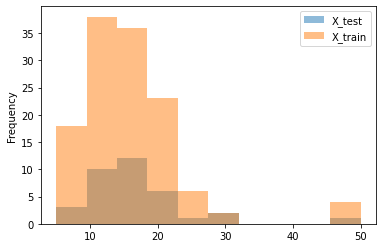

In [31]:
y_test['target'][labels_test == 1].plot.hist(alpha = 0.5)
y_train['target'][labels_train == 1].plot.hist(alpha = 0.5)
plt.legend(['X_test', 'X_train'])

In [32]:
y_test[labels_test == 2].mean()

target    31.35
dtype: float64

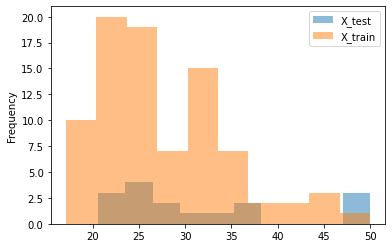

In [33]:
y_test['target'][labels_test == 2].plot.hist(alpha = 0.5)
y_train['target'][labels_train == 2].plot.hist(alpha = 0.5)
plt.legend(['X_test', 'X_train'])

Вычислите средние значения CRIM в разных кластерах.

In [34]:
X_test['CRIM'][labels_test == 0].mean()

0.26607882352941176

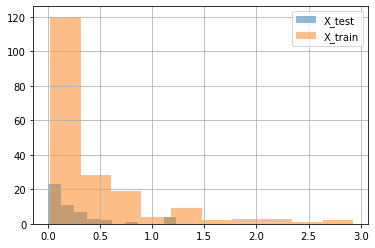

In [49]:
X_test['CRIM'][labels_test == 0].hist(alpha=0.5)
X_train['CRIM'][labels_train == 0].hist(alpha=0.5)
plt.legend(['X_test', 'X_train'])

In [37]:
X_test['CRIM'][labels_test == 1].mean()

10.165531142857143

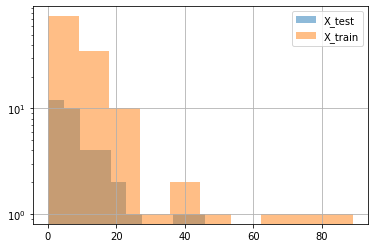

In [39]:
X_test['CRIM'][labels_test == 1].hist(alpha = 0.5, log=True)
X_train['CRIM'][labels_train == 1].hist(alpha = 0.5, log=True)
plt.legend(['X_test', 'X_train'])

In [44]:
X_test['CRIM'][labels_test == 2].mean()

0.062060000000000004

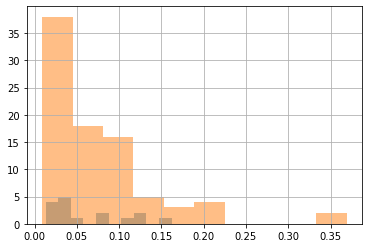

In [46]:
X_test['CRIM'][labels_test == 2].hist(alpha = 0.5)
X_train['CRIM'][labels_train == 2].hist(alpha = 0.5)